# Checking the credibility of the E/B decomposition

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

_Algorithm from QU to EB: Louis+[2013](http://dx.doi.org/10.1093/mnras/stt1421)_<br>
See also the test_perlin [notebook](https://github.com/Mipanox/PHYS366-final/blob/master/test_perlin.ipynb)

In [2]:
### Given pure B, or E, or mix, what does the field look like?!
def EB_to_vec(B,E):
    bf = np.fft.fft2(B)
    ef = np.fft.fft2(E)
    
    #####
    fq_x,fq_y = np.meshgrid(np.fft.fftfreq(ef.shape[1]),np.fft.fftfreq(ef.shape[0]))
    phi_l = np.mod(np.arctan2(fq_y,fq_x),np.pi) 
    phi_c = 2 * phi_l
    
    qf = ef * np.cos(phi_c) - bf * np.sin(phi_c)
    uf = ef * np.sin(phi_c) + bf * np.cos(phi_c)
    
    #####    
    Q, U = np.real(np.fft.ifft2(qf)), np.real(np.fft.ifft2(uf))
    
    pa = np.mod(0.5 * np.arctan2(U,Q),np.pi)
    
    xx, yy = np.cos(pa), np.sin(pa)
    
    return pa, (xx, yy)

In [8]:
def vec_to_EB(cx,cy):
    psi = np.arctan2(cy,cx)
    # use 'arctan2' to avoid division by zero
    Q = np.cos(2*psi)
    U = np.sin(2*psi)

    qf = np.fft.fft2(Q)
    uf = np.fft.fft2(U)
    
    ## frequencies
    fq_x,fq_y = np.meshgrid(np.fft.fftfreq(qf.shape[1]),np.fft.fftfreq(qf.shape[0]))
    
    ## phi_l : the angle between the vector l and the lx axis
    phi_l = np.arctan2(fq_y,fq_x)
    phi_c = 2 * phi_l
    
    ef =  qf * np.cos(phi_c) + uf * np.sin(phi_c)
    bf = -qf * np.sin(phi_c) + uf * np.cos(phi_c)
    
    from scipy.fftpack import ifft2, ifft
    E1 = ifft2(ef)
    B1 = ifft2(bf)
    
    return E1, B1

### Generate (almost) pure E- and B- modes

In [4]:
## dominating B-mode
B = np.ones((100,100)) + np.random.random((100,100))*1e-3
E = np.random.random((100,100)) * 1e-3 

## dominating E-mode
B_ = np.random.random((100,100))* 1e-3 
E_ = np.ones((100,100)) + np.random.random((100,100))* 1e-3

In [5]:
pa,(xx,yy) = EB_to_vec(B,E)
pa_,(xx_,yy_) = EB_to_vec(B_,E_)

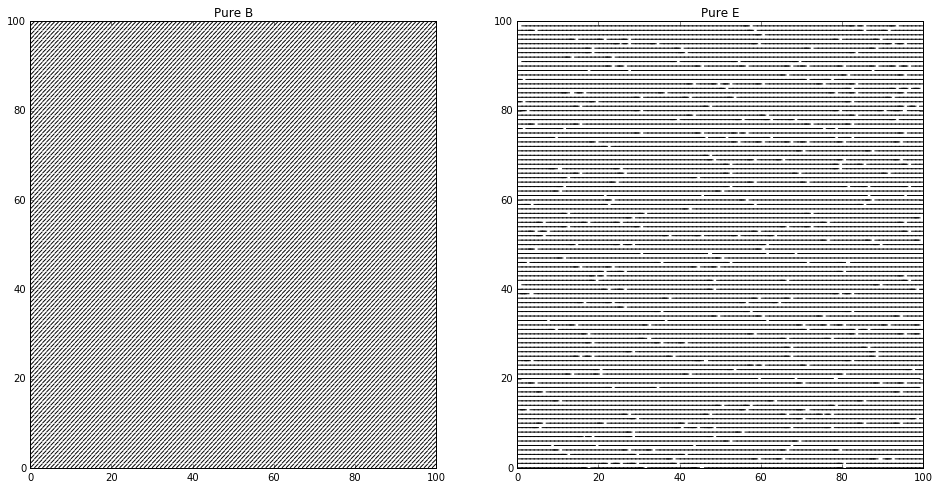

In [6]:
plt.figure(figsize=(16,8))
plt.subplot(121)
X,Y = np.meshgrid(np.arange(B.shape[0]),np.arange(B.shape[1]))
plt.quiver(X,Y,xx,yy,scale=40,headwidth=0)
plt.title('Pure B')

plt.subplot(122)
X,Y = np.meshgrid(np.arange(B.shape[0]),np.arange(B.shape[1]))
plt.quiver(X,Y,xx_,yy_,scale=40,headwidth=0)
plt.title('Pure E')

these look like expected: oriented 45 deg or parallel/perpendicular to the x/y axis.

### Magnitude of the modes
Let's transform back the pure B-mode vector field to E/B decomposed components...

In [10]:
pur_be, pur_b = vec_to_EB(xx,yy)

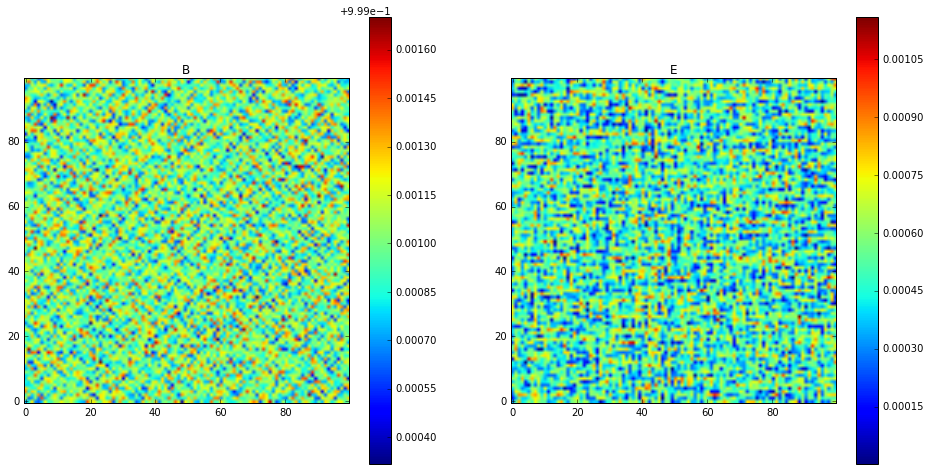

In [11]:
## Magnitude of the modes
plt.figure(figsize=(16,8))
plt.subplot(121)
X,Y = np.meshgrid(np.arange(pur_b.shape[0]),np.arange(pur_b.shape[1]))
plt.imshow(np.abs(pur_b), origin='lower')
plt.title('B'); plt.colorbar()

plt.subplot(122)
X,Y = np.meshgrid(np.arange(pur_b.shape[0]),np.arange(pur_b.shape[1]))
plt.imshow(np.abs(pur_be), origin='lower')
plt.title('E'); plt.colorbar()

note the color bars. This works. The transformation functions should be producing the correct results.